## Introduction:
The agricultural sector in Nigeria plays a pivotal role in the nation's economy, contributing significantly to employment, food security, and overall economic development. Among the myriad of crops cultivated across the country, certain key crops stand out as cornerstones of agricultural production. These crops, including beans, cassava, cocoyam, cotton, groundnut, guinea corn, maize, melon, and rice, not only form the backbone of agricultural activity but also contribute substantially to Nigeria's export earnings and domestic consumption.

## Problem Statement:
Despite the importance of these major crops in Nigeria's agricultural landscape, farmers often face challenges in deciding which crops to plant, especially when considering varying weather conditions and soil characteristics. The success of crop cultivation is highly dependent on factors such as temperature, precipitation, soil fertility, and pest prevalence, among others. However, making informed decisions regarding crop selection based on these variables can be daunting for farmers, leading to suboptimal yields and economic losses.

To address this challenge, there is a pressing need for a robust decision support system that leverages weather data, soil information, and crop-specific agronomic knowledge to provide tailored recommendations to farmers. Such a model would empower farmers to make data-driven choices regarding crop selection, optimizing agricultural productivity and resilience in the face of changing environmental conditions. By integrating advanced analytics and machine learning techniques, this model aims to enhance agricultural decision-making, ultimately contributing to the sustainable growth of Nigeria's agricultural sector and the well-being of its farming communities.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# Importing Data

In [2]:
crop = pd.read_csv("Crop_recommendation.csv")
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
crop.shape

(1697, 8)

In [4]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            1697 non-null   int64  
 1   P            1697 non-null   int64  
 2   K            1697 non-null   int64  
 3   temperature  1697 non-null   float64
 4   humidity     1697 non-null   float64
 5   ph           1697 non-null   float64
 6   rainfall     1697 non-null   float64
 7   label        1697 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 106.2+ KB


In [5]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [6]:
crop.duplicated().sum()

103

In [7]:
crop= crop.drop_duplicates()

In [8]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,1594.000000,1594.000000,1594.000000,1594.000000,1594.000000,1594.000000,1594.000000
mean,53.157465,58.504391,53.709536,24.690410,65.732970,6.441559,99.504943
std,38.358024,34.568313,58.362368,4.953632,24.212157,0.883872,51.474777
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,5.314507
25%,22.000000,36.000000,20.000000,21.588696,51.263068,5.864478,66.833034
50%,37.000000,53.500000,29.000000,24.882009,77.362465,6.355057,91.905004
75%,90.000000,72.000000,52.000000,27.776905,83.694175,6.932689,115.377537
max,140.000000,145.000000,205.000000,41.948657,94.964199,9.935091,298.560117


# Exploring Data

In [9]:
corr = crop.corr()
corr

<ipython-input-9-1dcd70030872>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = crop.corr()


,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.283658,-0.229386,-0.011613,0.253276,0.131402,0.117543
P,-0.283658,1.000000,0.831588,-0.166375,0.050935,-0.239309,-0.018800
K,-0.229386,0.831588,1.000000,-0.172540,0.217350,-0.148409,-0.071137
temperature,-0.011613,-0.166375,-0.172540,1.000000,0.184100,-0.123179,-0.048843
humidity,0.253276,0.050935,0.217350,0.184100,1.000000,-0.018250,0.002157
ph,0.131402,-0.239309,-0.148409,-0.123179,-0.018250,1.000000,-0.106746
rainfall,0.117543,-0.018800,-0.071137,-0.048843,0.002157,-0.106746,1.000000


<Axes: >

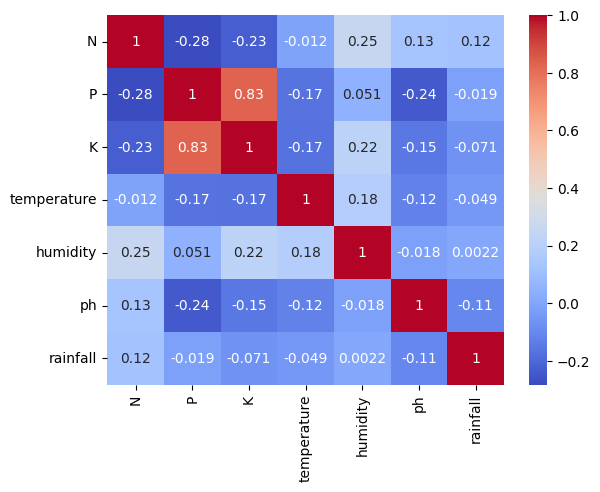

In [10]:
import seaborn as sns
sns.heatmap(corr,annot=True,cbar=True, cmap='coolwarm')

In [11]:
crop['label'].value_counts()

rice          139
Soyabeans     130
maize         119
banana        106
beans         100
peas          100
groundnuts    100
cowpeas       100
mango         100
grapes        100
watermelon    100
apple         100
orange        100
cotton        100
coffee        100
Name: label, dtype: int64

<ipython-input-12-112d7ba78cc4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop['N'])


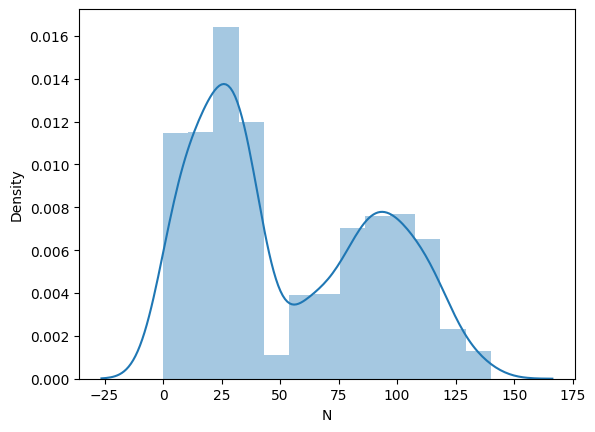

In [12]:
import matplotlib.pyplot as plt
sns.distplot(crop['N'])
plt.show()

# Encoding

In [13]:
crop_dict = {
    'rice': 1,
    'maize': 2,
    'Soyabeans': 3,
    'beans': 4,
    'peas': 5,
    'groundnuts': 6,
    'cowpeas': 7,
    'banana': 8,
    'mango': 9,
    'grapes': 10,
    'watermelon': 11,
    'apple': 12,
    'orange': 13,
    'cotton': 14,
    'coffee': 15
}

crop['crop_num']=crop['label'].map(crop_dict)

In [14]:
crop['crop_num'].value_counts()

1     139
3     130
2     119
8     106
4     100
5     100
6     100
7     100
9     100
10    100
11    100
12    100
13    100
14    100
15    100
Name: crop_num, dtype: int64

In [15]:
# crop.drop(['label'],axis=1,inplace=True)
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1


# Train Test Split

In [16]:
X = crop.drop(['crop_num','label'],axis=1)
y = crop['crop_num']

In [17]:
X

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
1589,22,67,78,17.366064,14.724575,6.204091,73.326675
1590,36,65,80,18.487201,16.979216,6.051091,75.874456
1591,59,60,84,19.230253,18.967256,7.690962,95.709920
1592,54,77,85,17.341861,17.366243,7.829211,84.746067


In [18]:
y.shape

(1594,)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

In [21]:
X_train.shape

(1275, 7)

In [22]:
X_test.shape

(319, 7)

In [23]:
X_train

,N,P,K,temperature,humidity,ph,rainfall
1593,43,68,81,17.678094,18.232540,6.761600,79.920602
985,6,128,200,25.963084,82.578136,5.838748,70.317826
163,86,36,24,26.549864,72.891873,5.787268,73.336361
439,39,60,15,35.093574,30.986855,5.004075,116.910691
911,27,145,205,9.467960,82.293355,5.800243,66.027652
...,...,...,...,...,...,...,...
582,19,51,25,26.804744,48.239914,3.525366,43.878020
1269,39,9,15,25.354676,91.811832,7.992042,116.755594
836,16,35,31,32.276520,50.193688,5.316876,95.994871
933,9,141,202,21.012454,81.179319,6.119495,66.384483



# Scale the features using MinMaxScaler

In [24]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

X_train = ms.fit_transform(X_train)
X_test = ms.transform(X_test)

In [25]:
X_train

array([[0.30714286, 0.45      , 0.38      , ..., 0.04924655, 0.50604733,
        0.25441504],
       [0.04285714, 0.87857143, 0.975     , ..., 0.84652891, 0.36240586,
        0.22166852],
       [0.61428571, 0.22142857, 0.095     , ..., 0.72651002, 0.35439303,
        0.23196205],
       ...,
       [0.11428571, 0.21428571, 0.13      , ..., 0.44526526, 0.28117663,
        0.30923008],
       [0.06428571, 0.97142857, 0.985     , ..., 0.82919668, 0.40610402,
        0.20825538],
       [0.25      , 0.33571429, 0.07      , ..., 0.93720101, 0.49623741,
        0.1096088 ]])

# Standarization

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [27]:
X_train

array([[-0.26516196,  0.27389244,  0.46744087, ..., -1.95918867,
         0.37544303, -0.38199239],
       [-1.23530432,  2.00552644,  2.50679062, ...,  0.69580167,
        -0.68140237, -0.56833845],
       [ 0.86230078, -0.6496457 , -0.50939052, ...,  0.29613273,
        -0.74035695, -0.50976248],
       ...,
       [-0.97310368, -0.67850627, -0.38942877, ..., -0.64042646,
        -1.27904829, -0.07006419],
       [-1.15664413,  2.38071381,  2.5410654 , ...,  0.63808448,
        -0.35989215, -0.64466671],
       [-0.47492247, -0.18787663, -0.59507748, ...,  0.99774433,
         0.30326636, -1.20602092]])

# Training Models

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# create instances of all models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}


for name, md in models.items():
    md.fit(X_train,y_train)
    ypred = md.predict(X_test)

    print(f"{name}  with accuracy : {accuracy_score(y_test,ypred)}")

Logistic Regression  with accuracy : 0.9780564263322884
Naive Bayes  with accuracy : 1.0
Support Vector Machine  with accuracy : 0.9968652037617555
K-Nearest Neighbors  with accuracy : 0.9968652037617555
Decision Tree  with accuracy : 1.0
Random Forest  with accuracy : 1.0
Bagging  with accuracy : 1.0
AdaBoost  with accuracy : 0.3573667711598746
Gradient Boosting  with accuracy : 1.0
Extra Trees  with accuracy : 0.9561128526645768


In [29]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
ypred = rfc.predict(X_test)
accuracy_score(y_test,ypred)

1.0

# Predictive System

In [30]:
def recommendation(N,P,k,temperature,humidity,ph,rainfal):
    features = np.array([[N,P,k,temperature,humidity,ph,rainfal]])
    transformed_features = ms.fit_transform(features)
    transformed_features = sc.fit_transform(transformed_features)
    prediction = rfc.predict(transformed_features).reshape(1,-1)

    return prediction[0]

In [31]:
N = 40
P = 50
k = 50
temperature = 40.0
humidity = 20
ph = 100
rainfall = 100

predict = recommendation(N,P,k,temperature,humidity,ph,rainfall)

crop_dict = {
    1: "Rice",
    2: "Maize",
    3: "Soyabeans",
    4: "Beans",
    5: "Peas",
    6: "Groundnuts",
    7: "Cowpeas",
    8: "Banana",
    9: "Mango",
    10: "Grapes",
    11: "Watermelon",
    12: "Apple",
    13: "Orange",
    14: "Cotton",
    15: "Coffee"
}

if predict[0] in crop_dict:
    crop = crop_dict[predict[0]]
    print("{} is a best crop to be cultivated ".format(crop))
else:
    print("Sorry are not able to recommend a proper crop for this environment")

Maize is a best crop to be cultivated 


In [32]:
import pickle
pickle.dump(rfc,open('model.pkl','wb'))
pickle.dump(ms,open('minmaxscaler.pkl','wb'))
pickle.dump(sc,open('standscaler.pkl','wb'))